## Riemann sums

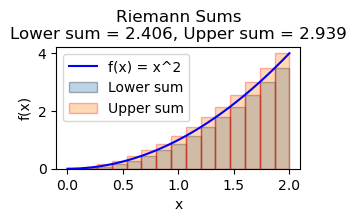

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return x**2

# Interval [a, b] and number of subintervals
a, b = 0, 2
n = 15
x = np.linspace(a, b, n+1)
dx = (b - a) / n

# Lower sum (left endpoints)
x_left = x[:-1]
lower_sum = np.sum(f(x_left) * dx)

# Upper sum (right endpoints)
x_right = x[1:]
upper_sum = np.sum(f(x_right) * dx)

# Plotting
X = np.linspace(a, b, 100)
plt.plot(X, f(X), 'b', label='f(x) = x^2')
plt.bar(x_left, f(x_left), width=dx, alpha=0.3, align='edge', edgecolor='k', label='Lower sum')
plt.bar(x_right-dx, f(x_right), width=dx, alpha=0.3, align='edge', edgecolor='r', label='Upper sum')
plt.legend()
plt.title(f'Riemann Sums\nLower sum = {lower_sum:.3f}, Upper sum = {upper_sum:.3f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.gcf().set_size_inches(8 / 2.54, 4 / 2.54)
plt.show()

## Quadratures
Quadrature is a general term for numerical methods that approximate the definite integral of a function over an interval $[a, b]$. For a single interval (not subdivided into smaller subintervals, i.e., not composite), quadrature formulas estimate the area under the curve by evaluating the function at specific points and combining these values with appropriate weights.

The general form of a quadrature rule on $[a, b]$ is:
$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n w_i\, f(x_i)
$$
where $x_i$ are the nodes (points in $[a, b]$) and $w_i$ are the corresponding weights.

Common non-composite quadrature rules include:
- **Midpoint rule:** Uses the function value at the midpoint of $[a, b]$.
- **Trapezoidal rule:** Uses the function values at the endpoints.
- **Simpson's rule:** Uses the function values at the endpoints and the midpoint.

These rules provide increasingly accurate approximations for smooth functions, especially when the interval is small. For higher accuracy over larger intervals, composite versions (applying the rule to many subintervals) are often used.


In [10]:
# Defining functions that uses numerical integration for a function f over the interval [a, b].
def midpoint_rule(f, a, b):
    """Approximate the integral of f over [a, b] using the midpoint rule."""
    mid = (a + b) / 2
    return (b - a) * f(mid)

def trapezoidal_rule(f, a, b):
    """Approximate the integral of f over [a, b] using the trapezoidal rule."""
    return (b - a) * (f(a) + f(b)) / 2

def simpsons_rule(f, a, b):
    """Approximate the integral of f over [a, b] using Simpson's rule."""
    mid = (a + b) / 2
    return (b - a) * (f(a) + 4 * f(mid) + f(b)) / 6

In [ ]:
# Example functions for integration and plotting

def f_linear(x):
    """Linear function: f(x) = 2x + 1"""
    return 2 * x + 1

def f_quadratic(x):
    """Quadratic function: f(x) = x^2"""
    return x ** 2

def f_cubic(x):
    """Cubic function: f(x) = x^3 - x + 2"""
    return x ** 3 - x + 2

def f_sin(x):
    """Sine function: f(x) = sin(pi * x)"""
    return np.sin(np.pi * x)

def f_exp(x):
    """Exponential function: f(x) = exp(x)"""
    return np.exp(x)



In [20]:
# Use the functions above to check the different numerical integrating methods.

f=f_quadratic # Change this to test different functions
a=0 # Lower limit of integration
b=1 # Upper limit of integration
midpoint_result = midpoint_rule(f, a, b) # Midpoint rule result
trapezoidal_result = trapezoidal_rule(f, a, b) # Trapezoidal rule result
simpsons_result = simpsons_rule(f, a, b) # Simpson's rule result

print(f"The results are:")
print(f"Midpoint Rule = {midpoint_result}")
print(f"Trapezoidal Rule = {trapezoidal_result}")
print(f"Simpson's Rule = {simpsons_result}")

The results are:
Midpoint Rule = 0.25
Trapezoidal Rule = 0.5
Simpson's Rule = 0.3333333333333333


### Gaussian Quadratures

**Gaussian quadrature** is a powerful numerical integration technique that approximates the definite integral of a function, typically over a finite interval, by a weighted sum of function values at specific points (called nodes or abscissas):

$$
\int_a^b f(x)\,dx \approx \sum_{i=1}^n w_i\, f(x_i)
$$

- The nodes $x_i$ and weights $w_i$ are chosen so that the formula is exact for all polynomials of degree up to $2n-1$.
- The most common form is **Gauss-Legendre quadrature**, which integrates over $[-1, 1]$ using roots of Legendre polynomials as nodes.
- For other intervals $[a, b]$, a change of variables is used to map $[a, b]$ to $[-1, 1]$.

#### Key Points:
- **Accuracy:** Gaussian quadrature is much more accurate than Newton-Cotes formulas (like trapezoidal or Simpson's rule) for the same number of points, especially for smooth functions.
- **Nodes and Weights:** Both are precomputed and tabulated for standard cases, or can be computed numerically.
- **Generalization:** Other types (e.g., Gauss-Chebyshev, Gauss-Laguerre, Gauss-Hermite) exist for different weight functions and intervals.

#### Example (2-point Gauss-Legendre quadrature on $[-1, 1]$):

- Nodes: $x_1 = -\frac{1}{\sqrt{3}},\ x_2 = \frac{1}{\sqrt{3}}$
- Weights: $w_1 = w_2 = 1$

So,
$$
\int_{-1}^1 f(x)\,dx \approx f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$

#### Example (3-point Gauss-Legendre quadrature on $[-1, 1]$):

- Nodes: $x_1 = -\sqrt{\frac{3}{5}},\ x_2 = 0,\ x_3 = \sqrt{\frac{3}{5}}$
- Weights: $w_1 = w_3 = \frac{5}{9},\ w_2 = \frac{8}{9}$

So,
$$
\int_{-1}^1 f(x)\,dx \approx \frac{5}{9} f\left(-\sqrt{\frac{3}{5}}\right) + \frac{8}{9} f(0) + \frac{5}{9} f\left(\sqrt{\frac{3}{5}}\right)
$$

#### Summary

Gaussian quadrature achieves high accuracy with fewer function evaluations by optimally choosing both the nodes and weights, making it especially useful for integrating polynomials and smooth functions.

### Example 10 p. 57. 
$$
\int_{-1}^{1} \frac{1}{x+2} d\!x
$$

In [25]:
# Define the function to integrate
def f_integrand(x):
    return 1 / (x + 2)

# Limits
a, b = -1, 1

# Midpoint rule
midpoint_val = midpoint_rule(f_integrand, a, b)

# Trapezoidal rule
trapezoidal_val = trapezoidal_rule(f_integrand, a, b)

# Simpson's rule
simpsons_val = simpsons_rule(f_integrand, a, b)

# Gaussian quadrature (2-point and 3-point Gauss-Legendre)
# Nodes and weights for [-1, 1]
# 2-point
g2_nodes = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
g2_weights = np.array([1, 1])
gauss2_val = np.sum(g2_weights * f_integrand(g2_nodes))

# 3-point
g3_nodes = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
g3_weights = np.array([5/9, 8/9, 5/9])
gauss3_val = np.sum(g3_weights * f_integrand(g3_nodes))

answ=np.log(3)

print("Integration of 1/(x+2) from -1 to 1:")
print(f"Exact value: {answ:.8f}")
print(f"Midpoint rule:      {midpoint_val:.8f} error: {np.abs(midpoint_val - answ):.8f}")
print(f"Trapezoidal rule:   {trapezoidal_val:.8f} error: {np.abs(trapezoidal_val - answ):.8f}")
print(f"Simpson's rule:     {simpsons_val:.8f} error: {np.abs(simpsons_val - answ):.8f}")
print(f"Gaussian 2-point:   {gauss2_val:.8f} error: {np.abs(gauss2_val - answ):.8f}")
print(f"Gaussian 3-point:   {gauss3_val:.8f} error: {np.abs(gauss3_val - answ):.8f}")

Integration of 1/(x+2) from -1 to 1:
Exact value: 1.09861229
Midpoint rule:      1.00000000 error: 0.09861229
Trapezoidal rule:   1.33333333 error: 0.23472104
Simpson's rule:     1.11111111 error: 0.01249882
Gaussian 2-point:   1.09090909 error: 0.00770320
Gaussian 3-point:   1.09803922 error: 0.00057307


### Legendre Polynomials

**Legendre polynomials** are a sequence of orthogonal polynomials that arise frequently in physics, engineering, and numerical analysis, especially in the context of solving differential equations and in Gaussian quadrature.

#### Definition

The Legendre polynomials $P_n(x)$ are defined on the interval $[-1, 1]$ and can be generated using the recurrence relation:
$$
P_0(x) = 1,\quad P_1(x) = x
$$
$$
(n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
$$

Alternatively, they can be defined by Rodrigues' formula:
$$
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n
$$

#### Properties

- **Orthogonality:** Legendre polynomials are orthogonal with respect to the weight function $w(x) = 1 $ on $[-1, 1]$:
    $$
    \int_{-1}^1 P_n(x) P_m(x) dx = 0 \quad \text{if } n \ne m
    $$
- **Normalization:** $P_n(1) = 1$ for all $ n $.
- **Applications:** They are used in solving Laplace's equation in spherical coordinates, in expansions of functions (Legendre series), and as the basis for Gauss-Legendre quadrature nodes.

#### First Few Legendre Polynomials
$$
\begin{align*}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}(3x^2 - 1) \\
P_3(x) &= \frac{1}{2}(5x^3 - 3x) \\
P_4(x) &= \frac{1}{8}(35x^4 - 30x^2 + 3)
\end{align*}
$$

Legendre polynomials provide optimal nodes for Gaussian quadrature, allowing exact integration of polynomials up to degree \(2n-1\) using \(n\) points.

## Composite methods. 

In [ ]:
# The routines from the Turner book. 
def trapsum ( fcn , a , b , N) : 
    """ Function for approximating the integral of the function ‘ fcn ‘ 
    over the interval [a , b] in N segments using the trapezoid rule .  """
    h = (b - a) / N
    s = ( fcn (a) + fcn (b) ) / 2
    for k in range ( 1 , N) :
        s += fcn ( a + k * h )
    return s * h

def midsum(fcn, a, b, N):
    """Approximate the integral of fcn over [a, b] in N segments using the midpoint rule."""
    h = (b - a) / N
    s = 0
    for k in range(N):
        mid = a + (k + 0.5) * h
        s += fcn(mid)
    return s * h

def simpsum(fcn, a, b, N):
    """Approximate the integral of fcn over [a, b] in N segments using Simpson's rule.
    N must be even."""
    if N % 2 != 0:
        raise ValueError("N must be even for Simpson's rule.")
    h = (b - a) / N
    s = fcn(a) + fcn(b)
    for k in range(1, N, 2):
        s += 4 * fcn(a + k * h)
    for k in range(2, N, 2):
        s += 2 * fcn(a + k * h)
    return s * h / 3





## An example using data. 

The cell below estimates the distance covered by an object over 5 seconds using the trapezoidal rule for numerical integration. It uses arrays `t` (time points) and `v` (corresponding velocities) to approximate the integral of velocity with respect to time, which gives the total distance traveled. The result is printed as the estimated distance in meters. This demonstrates how the trapezoidal rule can be applied to real experimental data to compute definite integrals numerically.

In [16]:
# Given data
t = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
v = np.array([0, 7.51, 8.10, 8.93, 9.32, 9.76, 10.22, 10.56, 11.01, 11.22, 11.22])

# Trapezoidal rule for numerical integration
distance = np.trapezoid(v, t)
print(f"Estimated distance covered in 5 seconds: {distance:.2f} meters")

Estimated distance covered in 5 seconds: 46.12 meters


## Scipy and numpy

In [17]:
import scipy as sc
help(sc.integrate.quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        Th